In [1]:
import mplsoccer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from adjustText import adjust_text
from highlight_text import ax_text,fig_text

background = '#D6DBD9'
text_color = 'black'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Calibri'
mpl.rcParams['legend.fontsize'] = 15

In [2]:
import plotly.tools as tls
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [3]:
df = pd.read_csv('../playingtime.csv', index_col='Rk')
df_lgrank = pd.read_csv('../xGD.csv', index_col='Rk')

In [4]:
# Converting dictionary of team to their league rank
league_rank = df_lgrank[['Squad','LgRk']].set_index('Squad', drop=True).to_dict()

In [5]:
df['League_Rank'] = df['Squad'].apply(lambda x: league_rank['LgRk'][x])

In [6]:
leagues = df['Comp'].unique().tolist()

base_url = '../League Logos/'
leagues_dict = {'Ligue 1': base_url+'ligue1.png',
               'Premier League': base_url+'pl.png',
               'Bundesliga': base_url+'bl.png',
               'La Liga': base_url+'laliga.png',
               'Serie A': base_url+'seriea.png'}

In [7]:
league = leagues[1]

df = df[(df['Min']>=270) & (df['Min']<=3150)]
df = df.drop_duplicates()
df = df[df['Comp']==league]

Text(0.02, 0.02, 'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com. Updated till GW 38.                                        Inspiration: @lyonjust')

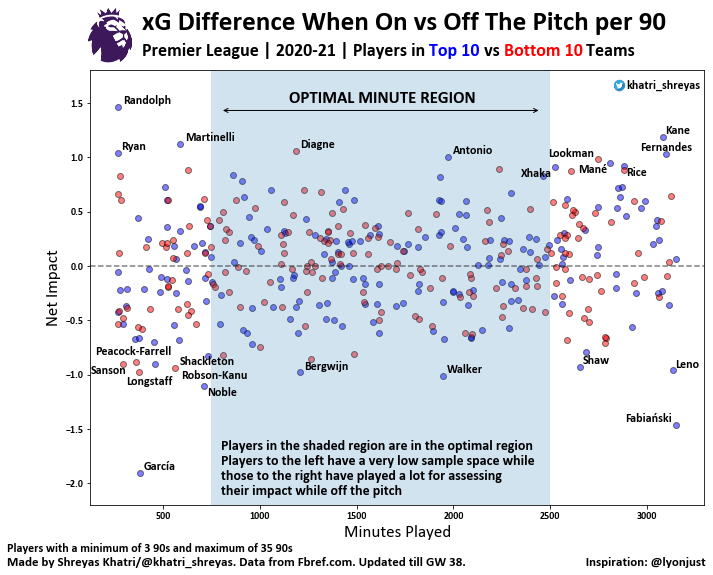

In [8]:
# Axes

fig, ax = plt.subplots(figsize=(11,8))

ax.axvspan(750, 2500, alpha=0.2)
ax.axhline(0, ls='--', alpha=0.5, c='black')

x, y = df[df['League_Rank']<=10]['Min'], df[df['League_Rank']<=10]['On-Off.1']
ax.scatter(x, y, c='blue', alpha=0.5, edgecolor='black');

x, y = df[df['League_Rank']>10]['Min'], df[df['League_Rank']>10]['On-Off.1']
ax.scatter(x, y, c='red', alpha=0.5, edgecolor='black');
ax.set_ylim([-2.2,1.8])

ax.annotate(s='', xy=(800,1.43), xytext=(2450,1.43), arrowprops=dict(arrowstyle='<->'))
ax.text(1150,1.5,'OPTIMAL MINUTE REGION', size=17)

q1 = df['On-Off.1'].quantile(0.25)
q3 = df['On-Off.1'].quantile(0.75)
outlier_top_lim = q3 +  (q3 - q1)
outlier_bottom_lim = q1 -  (q3 - q1)

texts = []
for xg, minutes, s in zip(df['On-Off.1'], df['Min'], df['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    if xg > outlier_top_lim or xg < outlier_bottom_lim:
        texts.append(ax.text(minutes, xg, name,
                              fontdict=dict(color='black', size=12)))

adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1.2, 1.2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))

ax.text(800,-2.1,'Players in the shaded region are in the optimal region\n'+
       'Players to the left have a very low sample space while\n'+
        'those to the right have played a lot for '+
        'assessing\ntheir impact while off the pitch', size=14);

# TITLES AND LABELS
fig.text(0.19,0.95,'xG Difference When On vs Off The Pitch per 90', size = 27, weight='heavy')
fig_text(0.19,0.93,league+' | 2020-21 | Players in <Top 10> vs <Bottom 10> Teams', size = 18, 
         highlight_textprops=[{'color':'blue'},{'color':'red'}])
ax.set_xlabel('Minutes Played', size=17)
ax.set_ylabel('Net Impact', size=17)

#LEAGUE LOGO
ax_im = fig.add_axes([0.1,0.89,0.10,0.10])
ax_im.axis('off')
im = plt.imread(leagues_dict[league])
ax_im.imshow(im)

# TWITTER
ax2 = fig.add_axes([0.78,0.84,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.802,0.848,'khatri_shreyas', size=12, weight='bold')

fig.text(0.02,0.045,'Players with a minimum of 3 90s and maximum of 35 90s', size=12)
fig.text(0.02,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com. Updated till GW 38.'+
         '                                        Inspiration: @lyonjust', size=13)

#plt.tight_layout()
#plotly_fig = tls.mpl_to_plotly(fig) ## convert 
#plotly.offline.plot(plotly_fig, filename="plotly version of an mpl figure")

#plt.savefig('xGPlus.png', facecolor='white', dpi=300)